## Imports


In [64]:
import numpy as np
import pandas as pd
from pathlib import Path
import tarfile
import urllib.request
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_selector
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder


### Data Fetching

In [2]:
def load_housing():
    tarball_path = Path('housing.tgz')
    if not tarball_path.is_file:
        print("Not found, try to download it...")
        Path('datasets').mkdir(parents=True, exist_ok=True)
        url="https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tar:
            housing_tar.extractall(path='datasets')
    print("Found in directory")
    return pd.read_csv(Path('datasets/housing/housing.csv'))

In [3]:
housing_raw = load_housing()

Found in directory


In [4]:
housing_raw.head(n=10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [5]:
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing_raw.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


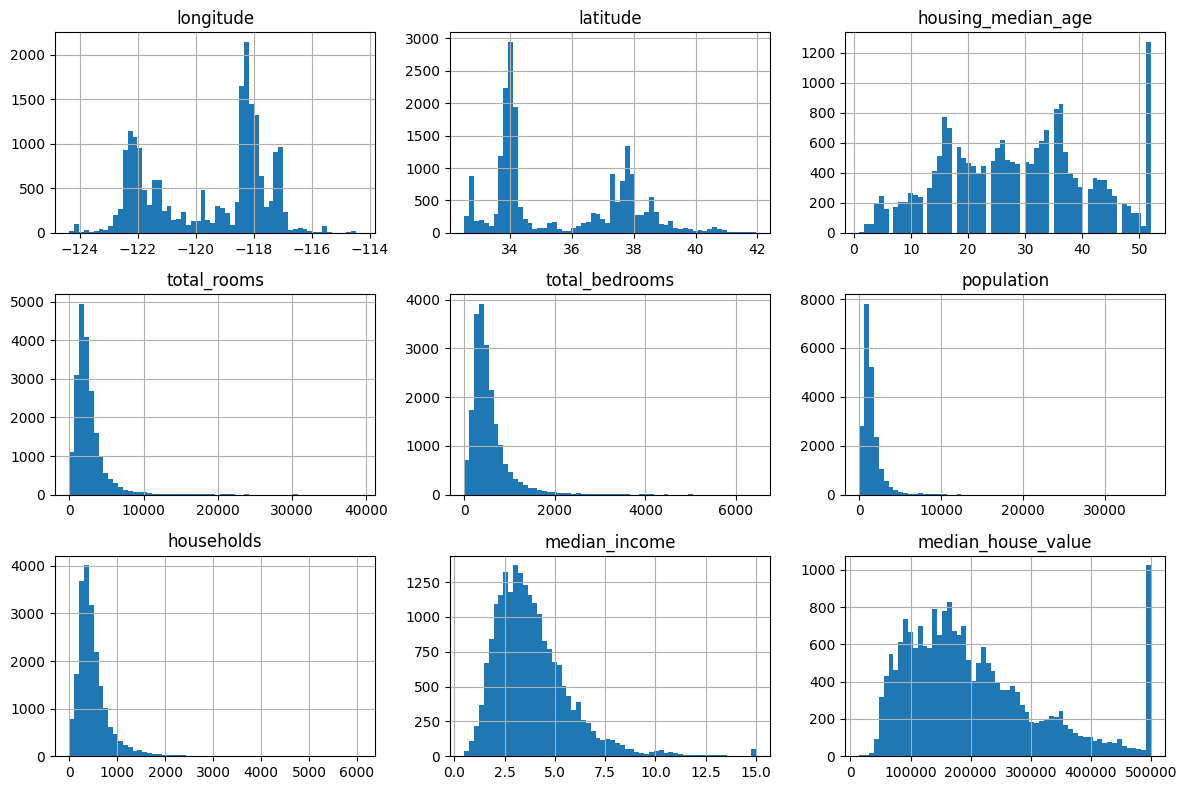

In [7]:
#plt.style.use('ggplot')
housing_raw.hist(bins=60,figsize=(12,8))
plt.tight_layout()

In [8]:
housing_raw["income_cat"] = pd.cut(housing_raw["median_income"], bins=[0., 1.5, 3., 4.5, 6, np.inf],labels=[1,2,3,4,5])

In [9]:
housing_raw["income_cat"].value_counts().sort_values()

income_cat
1     822
5    2362
4    3639
2    6581
3    7236
Name: count, dtype: int64

In [10]:
housing_train, housing_test = train_test_split(housing_raw, test_size=0.2,random_state=42, stratify=housing_raw["income_cat"])

In [11]:
housing_train.shape

(16512, 11)

In [12]:
housing_train.drop(columns=["income_cat"],inplace=True)
housing_test.drop(columns=["income_cat"], inplace=True)

In [13]:
housing_train.shape

(16512, 10)

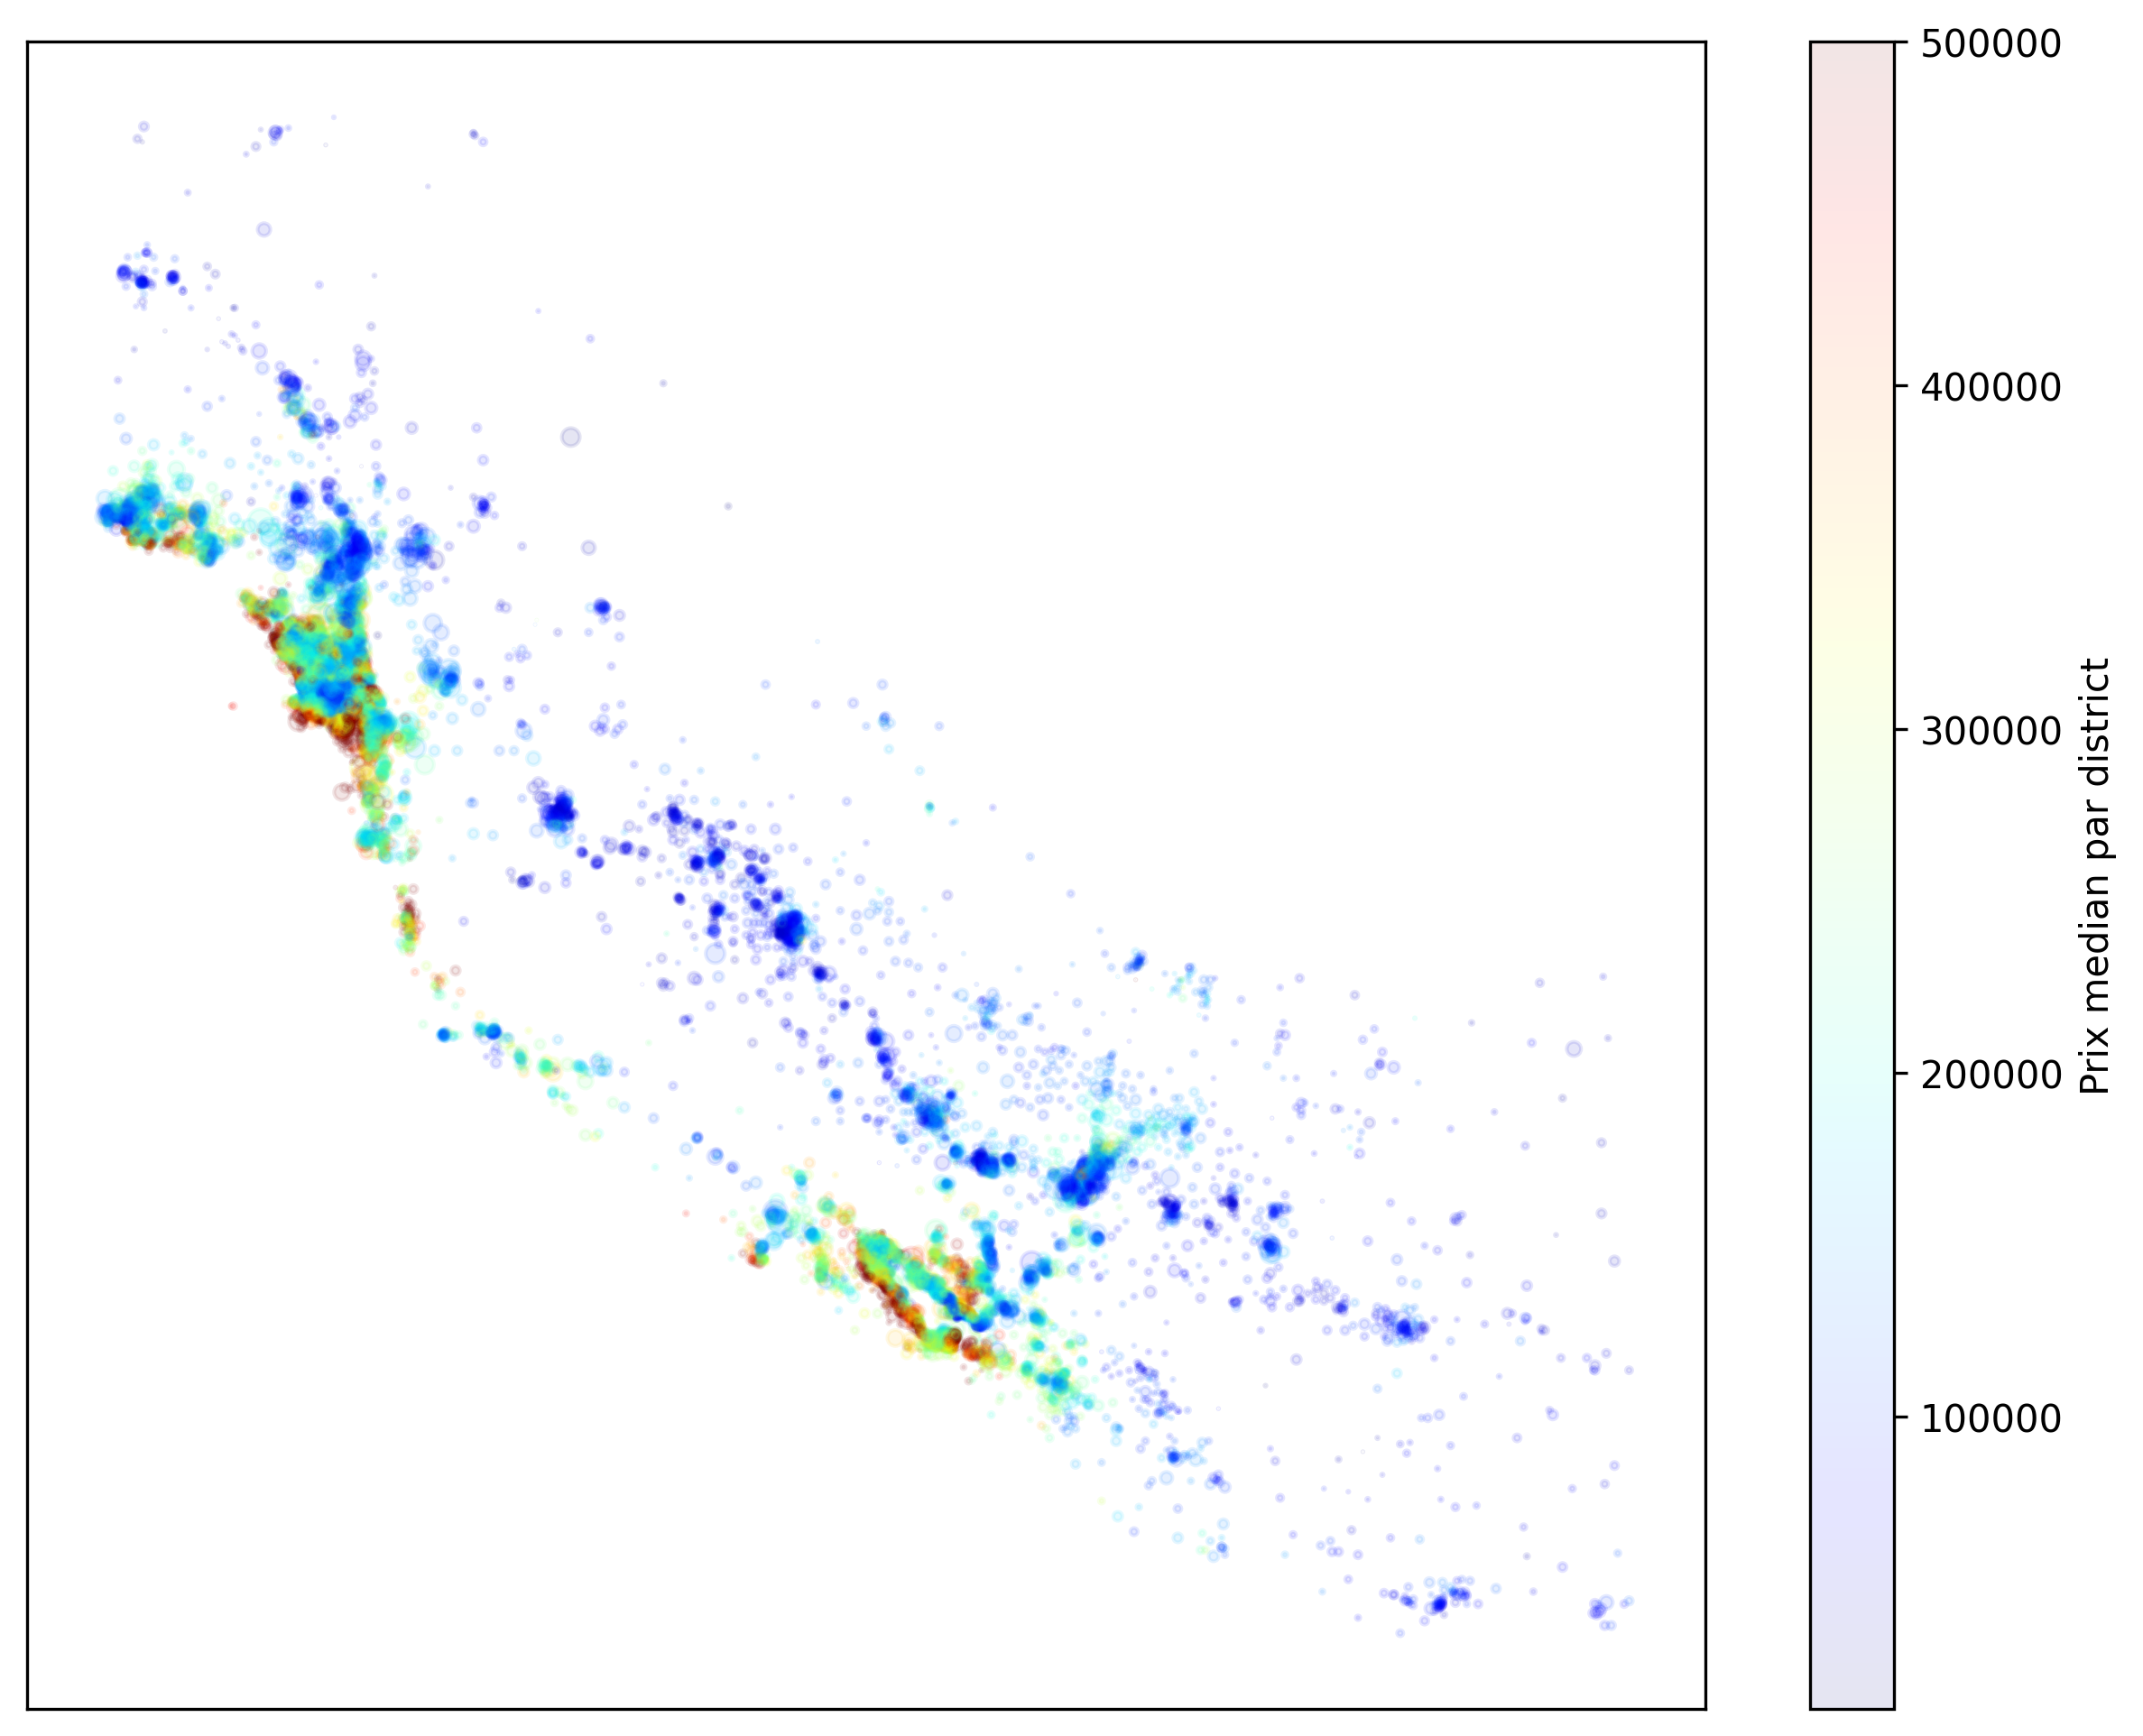

In [31]:
plt.figure(figsize=(10,8),dpi=300)
scatter = plt.scatter(
    x=housing_train["latitude"],
    y=housing_train["longitude"], 
    alpha=0.1, 
    s=housing_train["population"]/300,
    cmap='jet',
    c=housing_train["median_house_value"])
cbar = plt.colorbar(scatter)
plt.xlabel = "Latitude"
plt.ylabel = "Longitude"
cbar.set_label('Prix median par district')
plt.xticks([])
plt.yticks([])
plt.show()

In [74]:
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma=gamma
        self.random_state=random_state
    def fit(self,X,y=None,sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X,sample_weight=sample_weight)
        return self
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Similiarité au cluster {i}" for i in range(self.n_clusters)]


In [75]:
cluster_simil = ClusterSimilarity(random_state=42)
similarities = cluster_simil.fit_transform(housing_train[["latitude", "longitude"]],sample_weight=housing_train["median_house_value"])

In [76]:
similarities

array([[7.76542973e-17, 9.79800335e-01, 5.48714294e-08, ...,
        5.54756787e-01, 4.68660945e-14, 5.60181642e-01],
       [6.44368278e-01, 4.37928334e-13, 1.10563200e-01, ...,
        3.94562487e-17, 9.91430580e-01, 2.65430691e-10],
       [3.31752344e-17, 6.54513501e-01, 1.07069766e-08, ...,
        5.85660788e-01, 1.56121793e-14, 2.76994463e-01],
       ...,
       [1.20915228e-01, 2.94626804e-24, 8.21082019e-06, ...,
        9.05126434e-30, 2.27911432e-02, 2.57216447e-20],
       [6.54529515e-01, 2.83886458e-13, 1.06085724e-01, ...,
        2.31193217e-17, 9.95505588e-01, 1.85273211e-10],
       [2.52428219e-16, 9.68456695e-01, 1.35198859e-07, ...,
        4.42577246e-01, 1.42097447e-13, 6.51045403e-01]],
      shape=(16512, 10))

In [77]:
centers = cluster_simil.estimator_.cluster_centers_

AttributeError: 'ClusterSimilarity' object has no attribute 'estimator_'

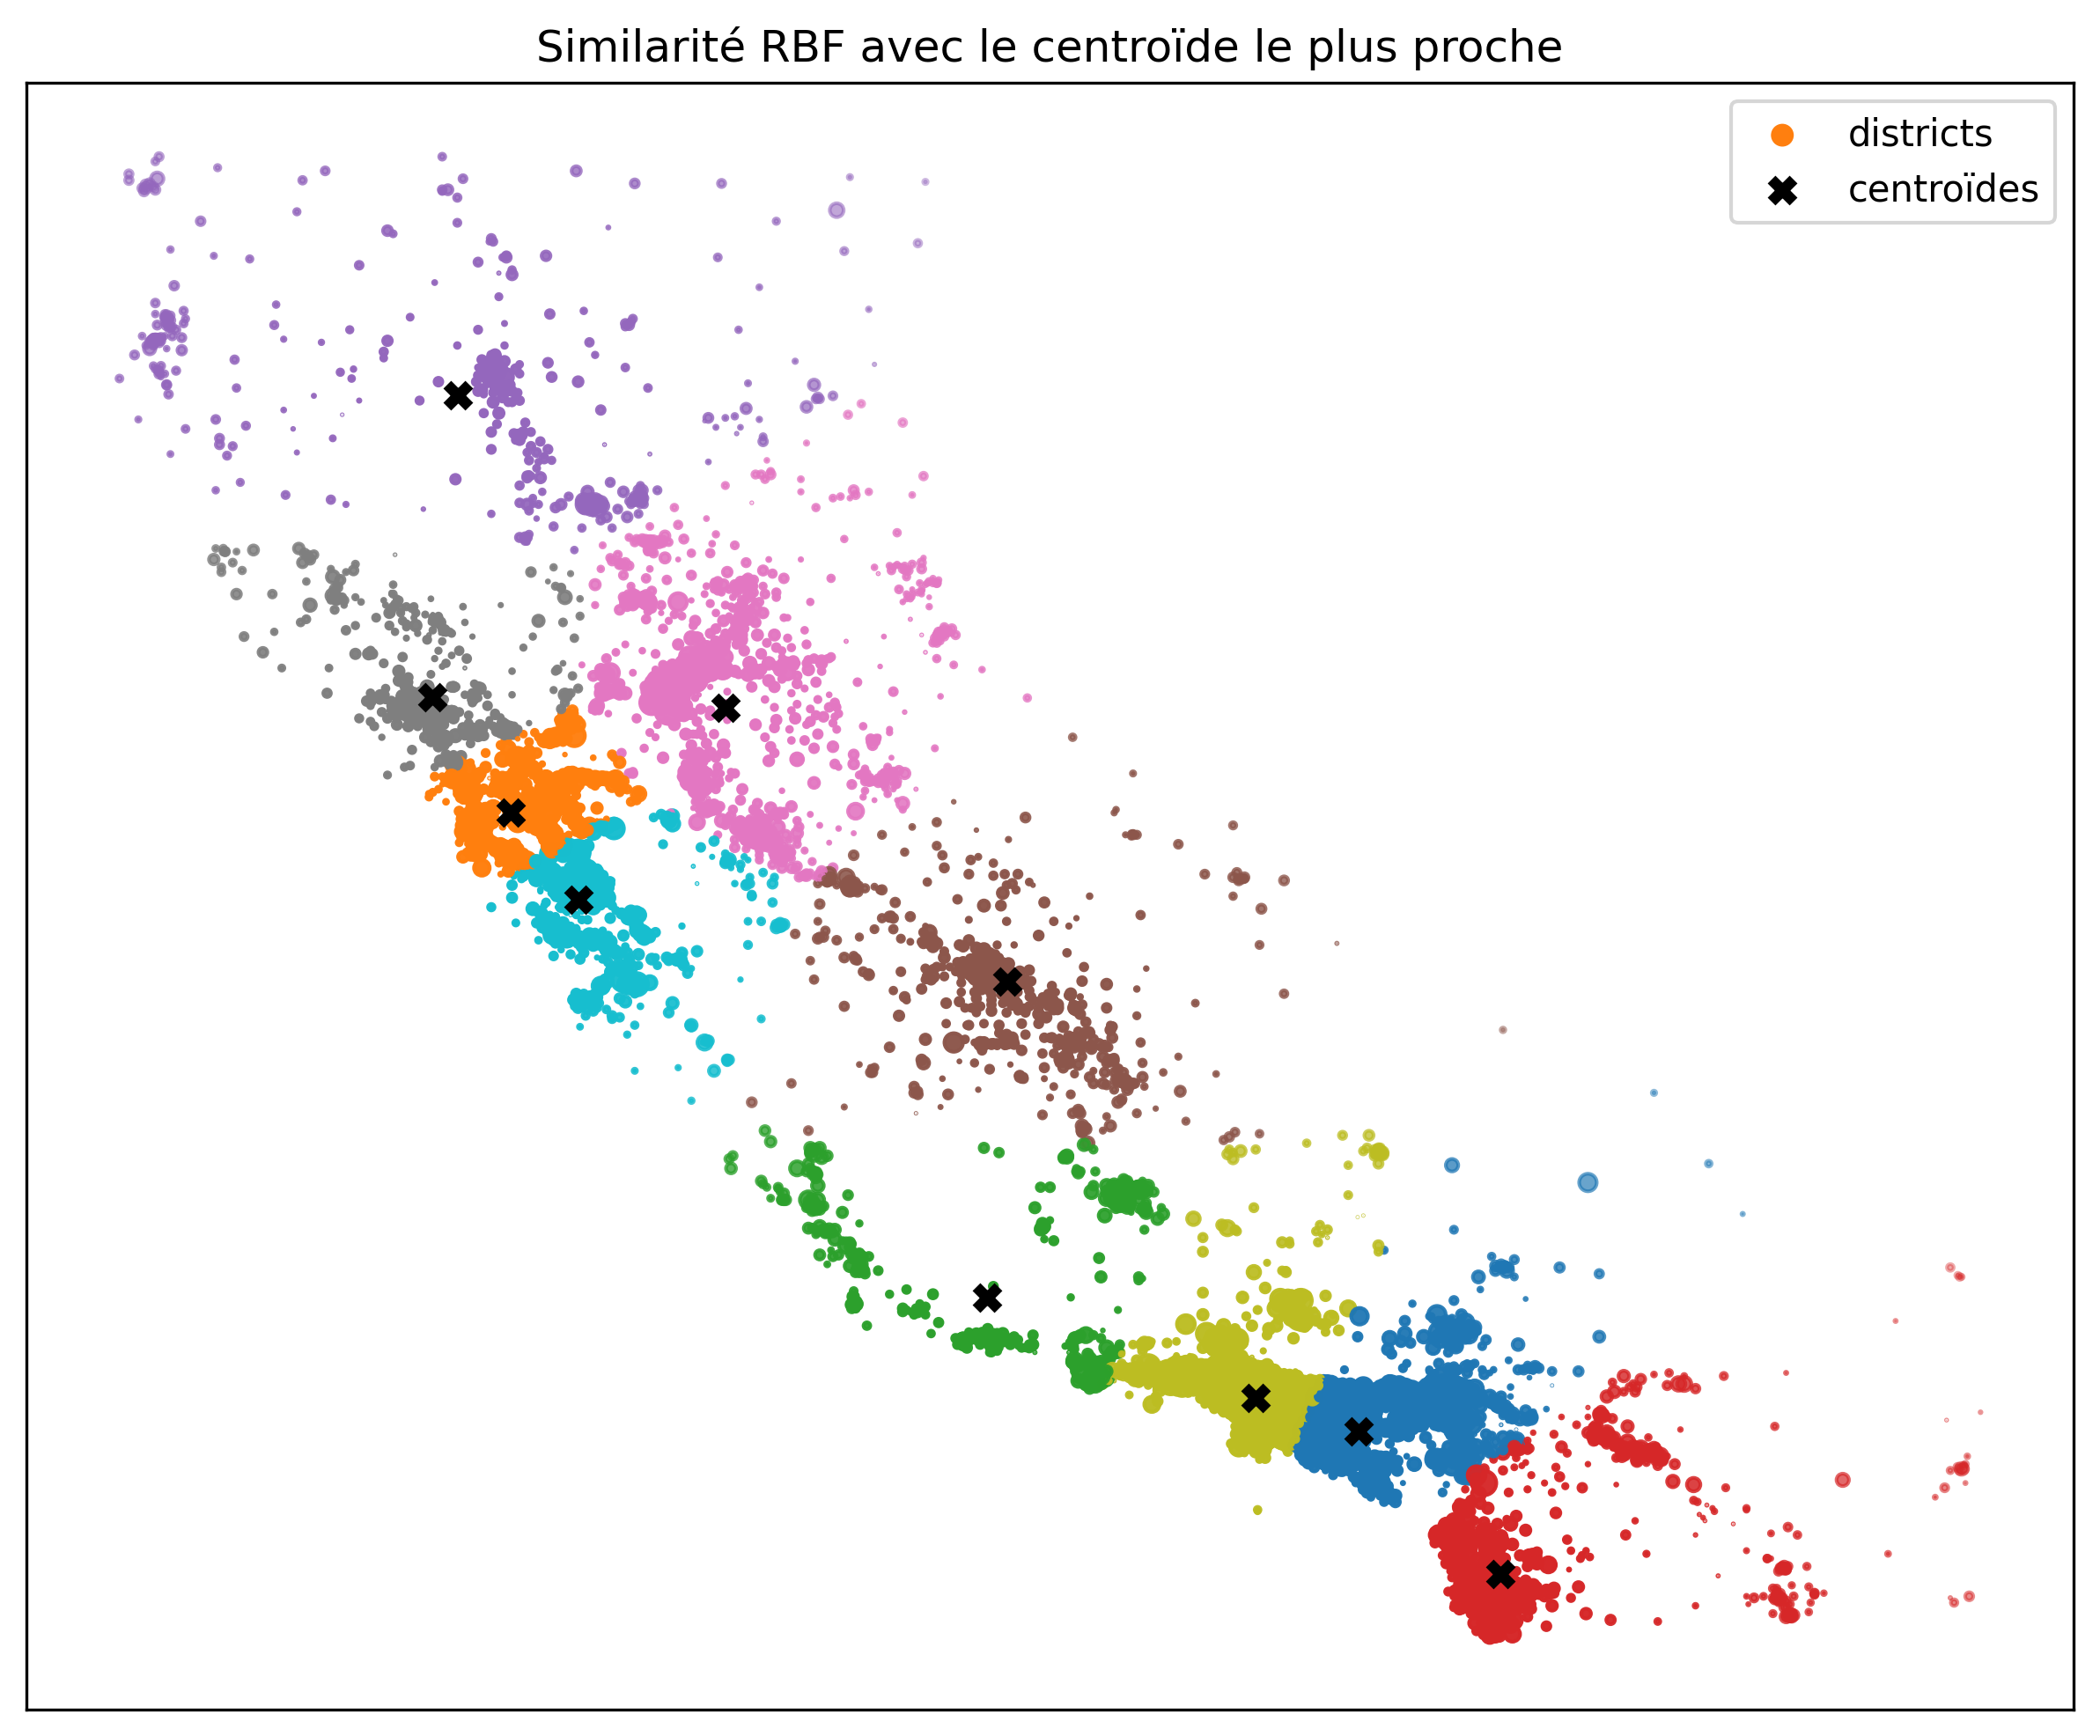

In [44]:
best_center = np.argmax(similarities,axis=1)
best_simil = np.max(similarities, axis=1)

colors = plt.get_cmap('tab10',10)
colored_point = [colors(c)[:3]+(sim,) for c, sim in zip(best_center,best_simil)]

plt.figure(figsize=(10,8),dpi=300)
plt.scatter(x=housing_train['longitude'],
            y=housing_train['latitude'],
            c =colored_point,
            s=housing_train['population']/300,
            label="districts")
plt.scatter(x=centers[:,1],y=centers[:,0],marker='x',linewidths=3, label="centroïdes",c='black')
plt.xlabel = "Longitude"
plt.ylabel = "Latitude"
plt.title("Similarité RBF avec le centroïde le plus proche")
plt.xticks([])
plt.yticks([])
plt.legend()


In [62]:
housing_train_num = housing_train.select_dtypes(include=["number"])
housing_train_cat = housing_train.select_dtypes(include=["object"])

housing_train_num.corrwith(housing_train_num["median_house_value"]).sort_values()

latitude             -0.139584
longitude            -0.050859
population           -0.020153
total_bedrooms        0.054635
households            0.071426
housing_median_age    0.102175
total_rooms           0.137455
median_income         0.688380
median_house_value    1.000000
dtype: float64

### Pipeline

In [63]:
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown="ignore"))

In [78]:
def colum_ratio(X):
    return X[:, [0]] /  X[:, [1]]
def ratio_name(function_transformer, features_names_in):
    return ["ratio"]
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(colum_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )
log_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             FunctionTransformer(np.log, feature_names_out="one-to-one"),
                             StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10,gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))
],
remainder=default_num_pipeline)

In [79]:
housing_train_prepared = preprocessing.fit_transform(housing_train)
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Similiarité au cluster 0',
       'geo__Similiarité au cluster 1', 'geo__Similiarité au cluster 2',
       'geo__Similiarité au cluster 3', 'geo__Similiarité au cluster 4',
       'geo__Similiarité au cluster 5', 'geo__Similiarité au cluster 6',
       'geo__Similiarité au cluster 7', 'geo__Similiarité au cluster 8',
       'geo__Similiarité au cluster 9', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age', 'remainder__median_house_value'],
      dtype=object)

In [71]:
housing_train_prepared_df = pd.DataFrame(housing_train_prepared,index=housing_train.index)